In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
# Baca ulang file Excel tanpa header, untuk manipulasi manual
full_df = pd.read_excel('Dataset UTS PMD.xlsx', sheet_name="Sheet1", header=None)

# Hapus dua baris pertama
cleaned_df = full_df.drop(index=[0, 1]).reset_index(drop=True)

# Ambil baris pertama sebagai header
new_header = cleaned_df.iloc[0]
cleaned_df = cleaned_df[1:]
cleaned_df.columns = new_header
cleaned_df = cleaned_df.reset_index(drop=True)

# Tampilkan 5 baris pertama dari dataset final
cleaned_df


,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Diabetic/NonDiabetic (D/N)
0,9,79,73,118,98,98.300707,99,0,0,N
1,9,80,73,119,102,98.300707,94,1,0,N
2,9,70,76,110,81,98.300707,98,1,0,N
3,9,70,78,115,96,98.300707,96,1,0,N
4,66,100,96,144,92,97.807052,98,0,0,N
...,...,...,...,...,...,...,...,...,...,...
16964,9,78,87,127,90,96.842657,97,0,0,D
16965,9,82,79,117,80,97.869454,98,0,0,D
16966,9,71,82,116,93,96.766282,98,0,0,D
16967,9,85,86,128,91,98.941036,98,0,0,D


In [3]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16969 entries, 0 to 16968
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         16969 non-null  object
 1   Blood Glucose Level(BGL)    16969 non-null  object
 2   Diastolic Blood Pressure    16969 non-null  object
 3   Systolic Blood Pressure     16969 non-null  object
 4   Heart Rate                  16969 non-null  object
 5   Body Temperature            16969 non-null  object
 6   SPO2                        16969 non-null  object
 7   Sweating  (Y/N)             16969 non-null  object
 8   Shivering (Y/N)             16969 non-null  object
 9   Diabetic/NonDiabetic (D/N)  16969 non-null  object
dtypes: object(10)
memory usage: 1.3+ MB


In [4]:
target_col = 'Diabetic/NonDiabetic (D/N)'

# Konversi semua kolom selain target ke numeric
for col in cleaned_df.columns:
    if col != target_col:
        cleaned_df[col] = pd.to_numeric(cleaned_df[col], errors='coerce')

# Encode target kolom: N -> 0, D -> 1
cleaned_df[target_col] = cleaned_df[target_col].map({'N': 0, 'D': 1})

# Simpan ke dalam file CSV
csv_final_path = "C:/Users/owner/latihan/dataset convert.csv"
cleaned_df.to_csv(csv_final_path, index=False)

# Tampilkan 5 baris pertama dari dataset final
cleaned_df


,Age,Blood Glucose Level(BGL),Diastolic Blood Pressure,Systolic Blood Pressure,Heart Rate,Body Temperature,SPO2,Sweating (Y/N),Shivering (Y/N),Diabetic/NonDiabetic (D/N)
0,9,79,73,118,98,98.300707,99,0,0,0
1,9,80,73,119,102,98.300707,94,1,0,0
2,9,70,76,110,81,98.300707,98,1,0,0
3,9,70,78,115,96,98.300707,96,1,0,0
4,66,100,96,144,92,97.807052,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...
16964,9,78,87,127,90,96.842657,97,0,0,1
16965,9,82,79,117,80,97.869454,98,0,0,1
16966,9,71,82,116,93,96.766282,98,0,0,1
16967,9,85,86,128,91,98.941036,98,0,0,1


In [5]:
cleaned_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16969 entries, 0 to 16968
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         16969 non-null  int64  
 1   Blood Glucose Level(BGL)    16969 non-null  int64  
 2   Diastolic Blood Pressure    16969 non-null  int64  
 3   Systolic Blood Pressure     16969 non-null  int64  
 4   Heart Rate                  16969 non-null  int64  
 5   Body Temperature            16969 non-null  float64
 6   SPO2                        16969 non-null  int64  
 7   Sweating  (Y/N)             16969 non-null  int64  
 8   Shivering (Y/N)             16969 non-null  int64  
 9   Diabetic/NonDiabetic (D/N)  16969 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 1.3 MB


In [6]:
missing_value = cleaned_df.isnull().sum()

# Menampilkan informasi dataset termasuk jumlah missing values
missing_summary = pd.DataFrame({
    "Data Type": cleaned_df.dtypes,
    "Missing Values": missing_value,
    "Missing Percentage": (missing_value / len(cleaned_df)) * 100
})

missing_summary

,Data Type,Missing Values,Missing Percentage
0,,,
Age,int64,0,0.0
Blood Glucose Level(BGL),int64,0,0.0
Diastolic Blood Pressure,int64,0,0.0
Systolic Blood Pressure,int64,0,0.0
Heart Rate,int64,0,0.0
Body Temperature,float64,0,0.0
SPO2,int64,0,0.0
Sweating (Y/N),int64,0,0.0
Shivering (Y/N),int64,0,0.0


In [7]:
# Cek jumlah data duplikat
duplikat = cleaned_df.duplicated().sum()

print(f"Jumlah data duplikat: {duplikat}")


Jumlah data duplikat: 268


In [8]:
cleaned_df = cleaned_df.drop_duplicates()
duplikat = cleaned_df.duplicated().sum()

print(f"Jumlah data duplikat: {duplikat}")

Jumlah data duplikat: 0


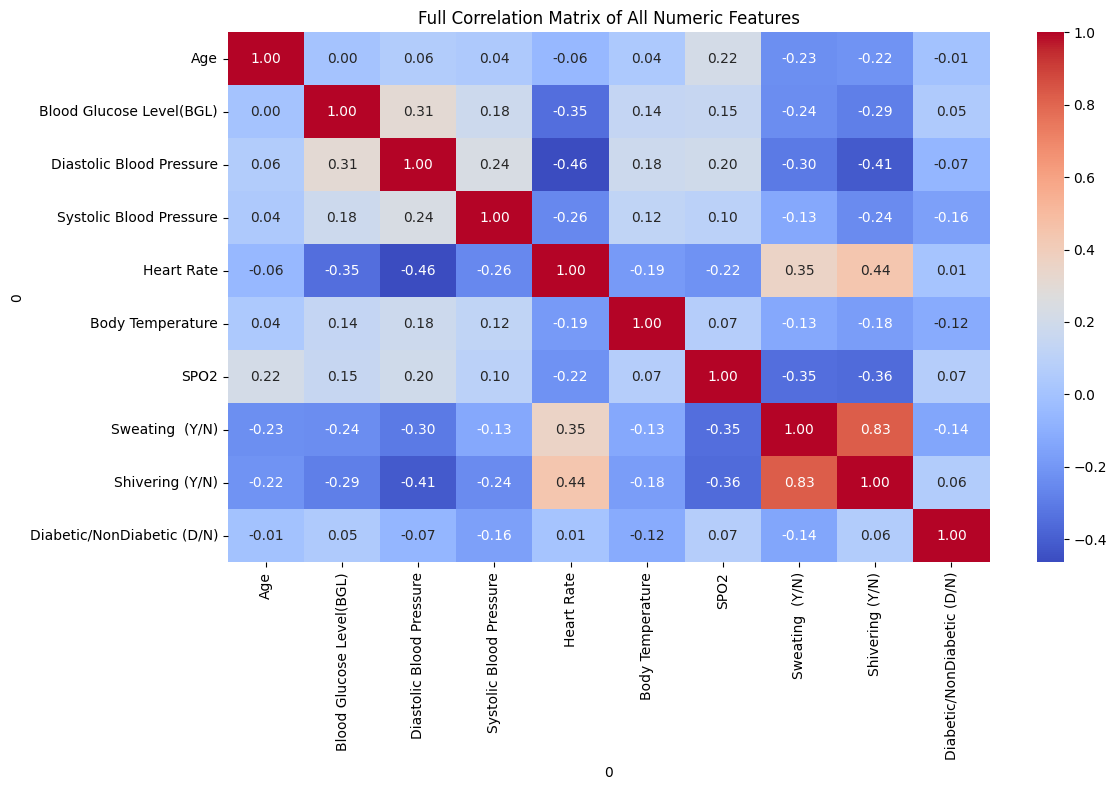

In [9]:
# Korelasi terhadap target yang sudah dikonversi (langsung fokus ke correlation matrix)
correlation_matrix = cleaned_df.corr(numeric_only=True)
cor_target = correlation_matrix[target_col].abs().sort_values(ascending=False)

# Visualisasi correlation matrix untuk semua fitur numerik
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Full Correlation Matrix of All Numeric Features")
plt.tight_layout()
plt.show()



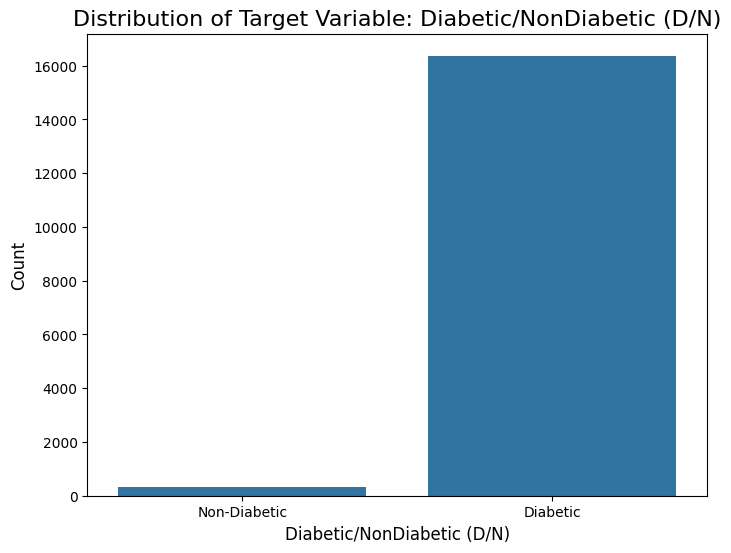

Diabetic/NonDiabetic (D/N)
1    16373
0      328
Name: count, dtype: int64

In [10]:

# Plotting the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=cleaned_df, x='Diabetic/NonDiabetic (D/N)')
plt.title('Distribution of Target Variable: Diabetic/NonDiabetic (D/N)', fontsize=16)
plt.xlabel('Diabetic/NonDiabetic (D/N)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=["Non-Diabetic", "Diabetic"])

# Show plot
plt.show()

# Show the count values for each class
target_distribution = cleaned_df['Diabetic/NonDiabetic (D/N)'].value_counts()
target_distribution

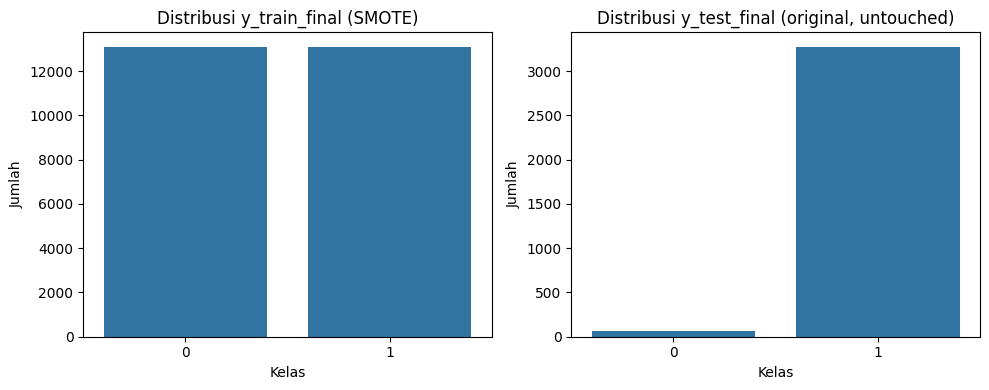

✅ X_train_final shape: (26196, 9)
✅ X_test_final shape : (3341, 9)


In [183]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = cleaned_df.drop(columns=['Diabetic/NonDiabetic (D/N)'])
y = cleaned_df['Diabetic/NonDiabetic (D/N)']

X_train_raw, X_test_final, y_train_raw, y_test_final = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# === SMOTE hanya ke data train ===
smote = SMOTE(random_state=42)
X_train_final, y_train_final = smote.fit_resample(X_train_raw, y_train_raw)

# === Konversi test set ke array jika belum ===
X_test_final = X_test_final.values
y_test_final = y_test_final.values

# === Visualisasi distribusi hasil SMOTE vs Test ===
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.countplot(x=y_train_final, ax=axs[0])
axs[0].set_title('Distribusi y_train_final (SMOTE)')
axs[0].set_xlabel('Kelas')
axs[0].set_ylabel('Jumlah')

sns.countplot(x=y_test_final, ax=axs[1])
axs[1].set_title('Distribusi y_test_final (original, untouched)')
axs[1].set_xlabel('Kelas')
axs[1].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()

print("✅ X_train_final shape:", X_train_final.shape)
print("✅ X_test_final shape :", X_test_final.shape)


In [184]:
# Inisialisasi scaler
scaler = MinMaxScaler()

# Fit dan transform X_train_smote
X_train_scaled = scaler.fit_transform(X_train_final)

# Transform X_test (tanpa fit!)
X_test_scaled = scaler.transform(X_test_final)

# Optional: Cek bentuk data setelah scaling
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (26196, 9)
X_test_scaled shape: (3341, 9)


c:\Users\owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


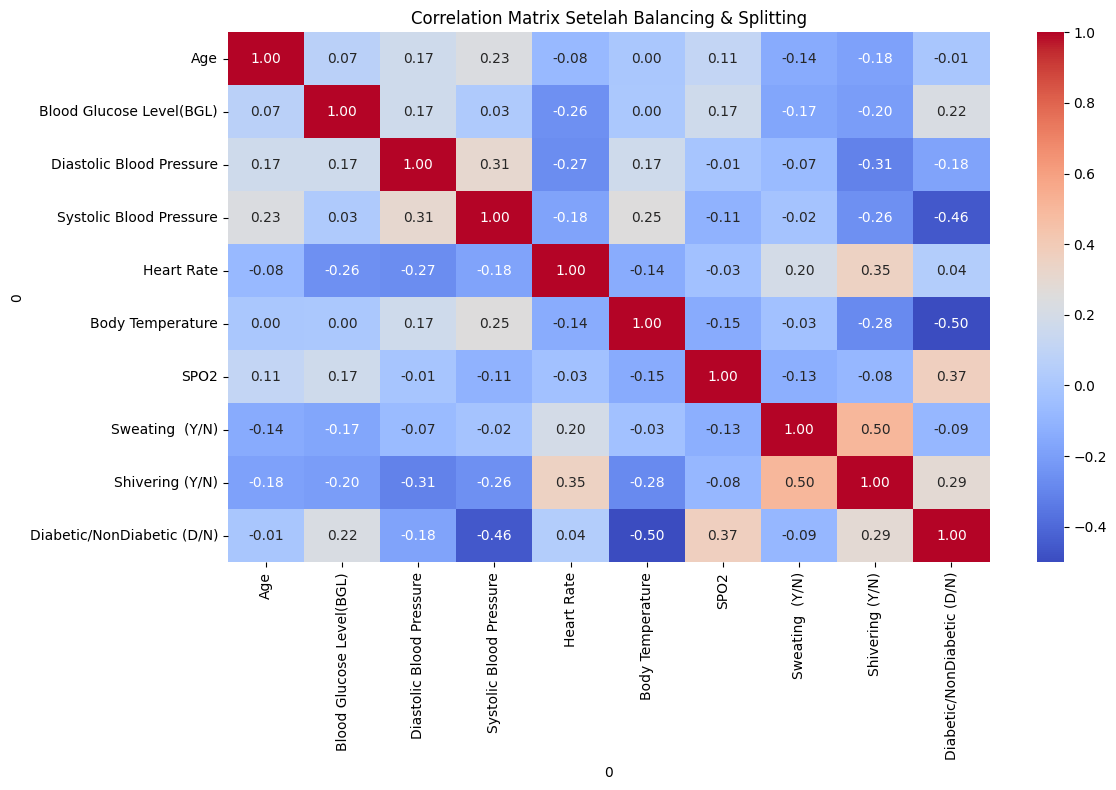

In [185]:
# Ubah menjadi DataFrame
X_train_final_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Gabungkan dengan target yang sesuai
Xy_train_final_df = X_train_final_df.copy()
Xy_train_final_df['Diabetic/NonDiabetic (D/N)'] = y_train_final

# Hitung korelasi matrix
final_corr_matrix = Xy_train_final_df.corr()

# Visualisasi
plt.figure(figsize=(12, 8))
sns.heatmap(final_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Setelah Balancing & Splitting")
plt.tight_layout()
plt.show()


In [186]:
# Kita akan memilih fitur yang korelasinya terhadap target (kolom "Diabetic/NonDiabetic (D/N)") cukup signifikan
# Ambil korelasi ke kolom target
target_corr = final_corr_matrix["Diabetic/NonDiabetic (D/N)"].drop("Diabetic/NonDiabetic (D/N)")

# Tetapkan ambang batas korelasi (misal |0.1| atau lebih)
selected_features = target_corr[abs(target_corr) >= 0.1].sort_values(ascending=False)

selected_features


0
SPO2                        0.369057
Shivering (Y/N)             0.289212
Blood Glucose Level(BGL)    0.223565
Diastolic Blood Pressure   -0.178504
Systolic Blood Pressure    -0.458519
Body Temperature           -0.500798
Name: Diabetic/NonDiabetic (D/N), dtype: float64

# SIGMOID


- w_ih = bobot input ke hidden
- b_h = bias ke hidden
- w_oh = bobot output ke hidden
- b_o = bias ke output
- z_h = z value ke hidden 
- z_o = z value ke output
- a_h = aktivasi hidden
- a_o = aktivasi output
- d_h = delta hidden
- d_o = delta eror

In [142]:
def sigmoid3(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative3(x):
    return x * (1 - x)

In [143]:
def forward_pass3(x, w_ih, b_h, w_ho, b_o):
    x = np.array(x, ndmin=2)  
    z_h = np.dot(x, w_ih) + b_h
    a_h = sigmoid3(z_h)
    z_o = np.dot(a_h, w_ho) + b_o
    a_o = sigmoid3(z_o)

    return x, z_h, a_h, z_o, a_o

In [144]:
def backward_pass3(x, y_true, z_h, a_h, z_o, a_o, w_ih, w_ho, b_h, b_o, alpha):
    error = y_true - a_o  # error output
    d_o = error * sigmoid_derivative3(a_o)
    error_hidden = d_o.dot(w_ho.T)
    d_h = error_hidden * sigmoid_derivative3(a_h)

    # Update bobot dan bias
    w_ho += a_h.T.dot(d_o) * alpha
    b_o += np.sum(d_o, axis=0, keepdims=True) * alpha
    w_ih += x.T.dot(d_h) * alpha
    b_h += np.sum(d_h, axis=0, keepdims=True) * alpha

    return w_ih, w_ho, b_h, b_o, np.mean(np.abs(error))

In [145]:
def train3(X_train, y_train, n_hidden=8, alpha=0.1, epochs=1000):
    input_dim = X_train.shape[1]
    output_dim = 1

    # Inisialisasi bobot & bias
    np.random.seed(42)
    w_ih = np.random.randn(input_dim, n_hidden)
    b_h = np.zeros((1, n_hidden))
    w_ho = np.random.randn(n_hidden, output_dim)
    b_o = np.zeros((1, output_dim))

    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X_train)):
            x = X_train[i]
            y = y_train[i]
            x, z_h, a_h, z_o, a_o = forward_pass3(x, w_ih, b_h, w_ho, b_o)
            w_ih, w_ho, b_h, b_o, err = backward_pass3(x, y, z_h, a_h, z_o, a_o, w_ih, w_ho, b_h, b_o, alpha)
            total_error += err
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Error: {total_error:.4f}")

    return w_ih, b_h, w_ho, b_o

In [146]:
def predict3(x, w_ih, b_h, w_ho, b_o):
    _, _, _, _, a_o = forward_pass3(x, w_ih, b_h, w_ho, b_o)
    return int(a_o >= 0.5)

In [188]:
import numpy as np
import time

y_train_arr = np.array(y_train_final).reshape(-1, 1)
y_test_arr = np.array(y_test_final).reshape(-1, 1)

# === TRAINING + Hitung waktu ===
start_train = time.time()
w_ih, b_h, w_ho, b_o = train3(X_train_scaled, y_train_arr, n_hidden=10, alpha=0.1, epochs=1000)
end_train = time.time()
train_time_sigmoid = end_train - start_train

# === TESTING + Hitung waktu ===
start_test = time.time()
y_pred = np.array([predict3(x, w_ih, b_h, w_ho, b_o) for x in X_test_scaled])
end_test = time.time()
test_time_sigmoid = end_test - start_test

y_true = np.array(y_test_final).astype(int)

# Akurasi
acc_sigmoid = np.sum(y_pred == y_true) / len(y_true)

# Confusion Matrix 
tp = np.sum((y_true == 1) & (y_pred == 1))
tn = np.sum((y_true == 0) & (y_pred == 0))
fp = np.sum((y_true == 0) & (y_pred == 1))
fn = np.sum((y_true == 1) & (y_pred == 0))

sensitivity_sigmoid = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity_sigmoid = tn / (tn + fp) if (tn + fp) != 0 else 0

# f1_sigmoid
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
f1_sigmoid = 2 * precision * sensitivity_sigmoid / (precision + sensitivity_sigmoid) if (precision + sensitivity_sigmoid) != 0 else 0



Epoch 0, Error: 1037.1188
Epoch 100, Error: 294.8936


KeyboardInterrupt: 

In [172]:
print(f"Waktu Train\t: {train_time_sigmoid:.4f} detik")
print(f"Waktu Test\t: {test_time_sigmoid:.4f} detik")
print(f"Akurasi\t\t: {acc_sigmoid:.4f}")
print(f"F1-Score\t: {f1_sigmoid:.4f}")
print(f"Sensitivity\t: {sensitivity_sigmoid:.4f}")
print(f"Specificity\t: {specificity_sigmoid:.4f}")

Waktu Train	: 554.6306 detik
Waktu Test	: 0.0245 detik
Akurasi		: 0.9784
F1-Score	: 0.9889
Sensitivity	: 0.9792
Specificity	: 0.9394


# TanH

In [151]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

In [152]:
def forward_pass2(x, w_ih, b_h, w_ho, b_o):
    x = np.array(x, ndmin=2)
    z_h = np.dot(x, w_ih) + b_h
    a_h = tanh(z_h)
    z_o = np.dot(a_h, w_ho) + b_o
    a_o = tanh(z_o)

    return x, z_h, a_h, z_o, a_o

In [153]:
def backward_pass2(x, y_true, z_h, a_h, z_o, a_o, w_ih, w_ho, b_h, b_o, alpha):
    error = y_true - a_o
    d_o = error * tanh_derivative(z_o)
    error_hidden = d_o.dot(w_ho.T)
    d_h = error_hidden * tanh_derivative(z_h)

    # Update weights and biases
    w_ho += a_h.T.dot(d_o) * alpha
    b_o += np.sum(d_o, axis=0, keepdims=True) * alpha
    w_ih += x.T.dot(d_h) * alpha
    b_h += np.sum(d_h, axis=0, keepdims=True) * alpha

    return w_ih, w_ho, b_h, b_o, np.mean(np.abs(error))

In [154]:
def train2(X_train, y_train, n_hidden=8, alpha=0.1, epochs=1000):
    input_dim = X_train.shape[1]
    output_dim = 1

    np.random.seed(42)
    w_ih = np.random.randn(input_dim, n_hidden) * 0.1
    b_h = np.zeros((1, n_hidden))
    w_ho = np.random.randn(n_hidden, output_dim) * 0.1
    b_o = np.zeros((1, output_dim))

    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X_train)):
            x = X_train[i]
            y = y_train[i]
            x, z_h, a_h, z_o, a_o = forward_pass2(x, w_ih, b_h, w_ho, b_o)
            w_ih, w_ho, b_h, b_o, err = backward_pass2(x, y, z_h, a_h, z_o, a_o, w_ih, w_ho, b_h, b_o, alpha)
            total_error += err
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Error: {total_error:.4f}")

    return w_ih, b_h, w_ho, b_o

In [155]:
def predict2(x, w_ih, b_h, w_ho, b_o):
    _, _, _, _, a_o = forward_pass2(x, w_ih, b_h, w_ho, b_o)
    return 1 if a_o >= 0 else 0  # Threshold tanh

In [169]:
import time

y_train_arr = np.where(np.array(y_train_final) == 0, -1, 1).reshape(-1, 1)
y_test_arr = np.where(np.array(y_test_final) == 0, -1, 1).reshape(-1, 1)

# === TRAINING + Hitung waktu ===
start_train = time.time()
w_ih, b_h, w_ho, b_o = train2(X_train_scaled, y_train_arr, n_hidden=10, alpha=0.1, epochs=2000)
end_train = time.time()
train_time_tanh = end_train - start_train

# === TESTING + Hitung waktu ===
start_test = time.time()
y_pred = np.array([predict2(x, w_ih, b_h, w_ho, b_o) for x in X_test_scaled])
end_test = time.time()
test_time_tanh = end_test - start_test

y_true = np.array(y_test_final).astype(int)

# Akurasi
acc_tanh = np.sum(y_pred == y_true) / len(y_true)

tp = np.sum((y_true == 1) & (y_pred == 1))
tn = np.sum((y_true == 0) & (y_pred == 0))
fp = np.sum((y_true == 0) & (y_pred == 1))
fn = np.sum((y_true == 1) & (y_pred == 0))

sensitivity_tanh = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity_tanh = tn / (tn + fp) if (tn + fp) != 0 else 0

# f1_tanh
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
f1_tanh = 2 * precision * sensitivity_tanh / (precision + sensitivity_tanh) if (precision + sensitivity_tanh) != 0 else 0


Epoch 0, Error: 2673.5494
Epoch 100, Error: 450.7342
Epoch 200, Error: 325.7400
Epoch 300, Error: 200.7385
Epoch 400, Error: 208.0520
Epoch 500, Error: 147.1344
Epoch 600, Error: 153.1508
Epoch 700, Error: 146.1551
Epoch 800, Error: 100.9560
Epoch 900, Error: 85.9060
Epoch 1000, Error: 118.1364
Epoch 1100, Error: 96.8560
Epoch 1200, Error: 81.2851
Epoch 1300, Error: 68.8698
Epoch 1400, Error: 61.1023
Epoch 1500, Error: 51.0332
Epoch 1600, Error: 64.6740
Epoch 1700, Error: 77.4617
Epoch 1800, Error: 76.2934
Epoch 1900, Error: 62.5028


In [173]:
print(f"Waktu Train\t: {train_time_tanh:.4f} detik")
print(f"Waktu Test\t: {test_time_tanh:.4f} detik")
print(f"Akurasi\t\t: {acc_tanh:.4f}")
print(f"F1-Score\t: {f1_tanh:.4f}")
print(f"Sensitivity\t: {sensitivity_tanh:.4f}")
print(f"Specificity\t: {specificity_tanh:.4f}")

Waktu Train	: 540.5909 detik
Waktu Test	: 0.0152 detik
Akurasi		: 0.9820
F1-Score	: 0.9908
Sensitivity	: 0.9829
Specificity	: 0.9394


# GLVQ


In [158]:
def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

In [159]:
def cari_winner_runner(x, prototypes, y_true):
    distances = {cls: euclidean_distance(x, proto) for cls, proto in prototypes.items()}
    sorted_classes = sorted(distances, key=distances.get)
    winner = None
    runner_up = None

    for cls in sorted_classes:
        if winner is None and cls == y_true:
            winner = cls
        elif runner_up is None and cls != y_true:
            runner_up = cls
        if winner is not None and runner_up is not None:
            break

    return winner, runner_up

In [160]:
def sigmoid_GLVQ(x):
    return 1 / (1 + np.exp(-x))

In [161]:
def cost_function(x, prototypes, y_true, winner, runner_up):
    d_winner = euclidean_distance(x, prototypes[winner])
    d_runner_up = euclidean_distance(x, prototypes[runner_up])
    mu = (d_winner - d_runner_up) / (d_winner + d_runner_up + 1e-8) 
    return sigmoid_GLVQ(mu)

In [162]:
def update_prototypes(prototypes, x, y_true, learning_rate, winner, runner_up):
    d_winner = euclidean_distance(x, prototypes[winner])
    d_runner_up = euclidean_distance(x, prototypes[runner_up])

    mu = (d_winner - d_runner_up) / (d_winner + d_runner_up + 1e-8)
    sigma_derivative = sigmoid_GLVQ(mu) * (1 - sigmoid_GLVQ(mu))

    arah_winner = (x - prototypes[winner]) / (d_winner + 1e-8)
    arah_runner_up = (x - prototypes[runner_up]) / (d_runner_up + 1e-8)

    # Update
    prototypes[winner] += learning_rate * sigma_derivative * arah_winner
    prototypes[runner_up] -= learning_rate * sigma_derivative * arah_runner_up

    return prototypes

In [163]:
def inisialisasi_prototype(X_train, y_train):
    unique_classes = np.unique(y_train)
    prototypes = {}
    for cls in unique_classes:
        prototypes[cls] = X_train[y_train == cls][0]
    return prototypes

# Inisialisasi prototipe
prototypes = inisialisasi_prototype(X_train_scaled, y_train_final)
print("Prototipe awal")
for cls, proto in prototypes.items():
    proto_str = ", ".join(f"{num:.3f}" for num in proto)
    print(f"Kelas {cls}: [{proto_str}]")


Prototipe awal
Kelas 0: [0.309, 0.130, 0.895, 0.894, 0.365, 0.670, 0.333, 0.000, 0.000]
Kelas 1: [0.985, 0.215, 0.711, 0.511, 0.269, 0.341, 0.833, 0.000, 0.000]


In [164]:
def train_glvq(X_train, y_train, epochs=100, learning_rate=0.05):
    prototypes = inisialisasi_prototype(X_train, y_train)
    for epoch in range(epochs):
        total_cost = 0

        for x, y in zip(X_train, y_train):
            winner, runner_up = cari_winner_runner(x, prototypes, y)
            prototypes = update_prototypes(prototypes, x, y, learning_rate, winner, runner_up)
            loss = cost_function(x, prototypes, y, winner, runner_up)
            total_cost += loss
        if epoch % 100 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Total Cost: {total_cost:.4f}")

    return prototypes

In [174]:
import time

start_train = time.time()
prototypes = train_glvq(X_train_scaled, y_train_final, epochs=1000, learning_rate=0.1)
end_train = time.time()
train_time_glvq = end_train - start_train

print("\n Prototipe akhir:")
for cls, proto in prototypes.items():
    proto_str = ", ".join(f"{num:.3f}" for num in proto)
    print(f"Kelas {cls}: [{proto_str}]")


Epoch 0, Total Cost: 2859.9401
Epoch 100, Total Cost: 2959.2604
Epoch 200, Total Cost: 2965.1463
Epoch 300, Total Cost: 2968.2407
Epoch 400, Total Cost: 2970.2884
Epoch 500, Total Cost: 2971.7956
Epoch 600, Total Cost: 2972.9761
Epoch 700, Total Cost: 2973.9394
Epoch 800, Total Cost: 2974.7486
Epoch 900, Total Cost: 2975.4435
Epoch 999, Total Cost: 2976.0445

 Prototipe akhir:
Kelas 0: [0.300, -2.352, 2.718, 6.829, -0.052, 8.490, -3.900, 2.529, -4.998]
Kelas 1: [0.370, 2.582, -1.636, -5.391, 0.599, -7.151, 4.898, -1.807, 5.064]


In [175]:
import numpy as np
import time

def predict_glvq(X_test, prototypes):
    predictions = []
    for x in X_test:
        distances = {cls: euclidean_distance(x, proto) for cls, proto in prototypes.items()}
        predicted_class = min(distances, key=distances.get)
        predictions.append(predicted_class)
    return np.array(predictions)

def evaluate_glvq(y_true, y_pred, test_time_glvq):
    y_true = np.array(y_true).astype(int)
    y_pred = np.array(y_pred).astype(int)

    # Akurasi
    acc_glvq = np.mean(y_pred == y_true)

    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    sensitivity_glvq = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity_glvq = tn / (tn + fp) if (tn + fp) != 0 else 0
    precision = tp / (tp + fp) if (tp + fp) != 0 else 0
    f1_glvq = 2 * precision * sensitivity_glvq / (precision + sensitivity_glvq) if (precision + sensitivity_glvq) != 0 else 0
    print(f"Waktu Train\t: {train_time_glvq:.4f} detik")
    print(f"Waktu Test\t: {test_time_glvq:.4f} detik")
    print(f"Akurasi\t\t: {acc_glvq:.4f}")
    print(f"F1-Score\t: {f1_glvq:.4f}")
    print(f"Sensitivity\t: {sensitivity_glvq:.4f}")
    print(f"Specificity\t: {specificity_glvq:.4f}")

    return acc_glvq

# Waktu test + prediksi
start_test = time.time()
y_pred = predict_glvq(X_test_scaled, prototypes)
end_test = time.time()
test_time_glvq = end_test - start_test

# Evaluasi
evaluate_glvq(y_test_final, y_pred, test_time_glvq)


Waktu Train	: 195.3921 detik
Waktu Test	: 0.0402 detik
Akurasi		: 0.9802
F1-Score	: 0.9900
Sensitivity	: 0.9930
Specificity	: 0.3485


np.float64(0.9802454354983537)

# HIDDEN ReLU - OUTPUT SIGMOID

In [176]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [177]:
def forward_pass(x, w_ih, b_h, w_ho, b_o):
    x = np.array(x, ndmin=2)
    z_h = np.dot(x, w_ih) + b_h
    a_h = relu(z_h)  # HIDDEN pakai ReLU

    z_o = np.dot(a_h, w_ho) + b_o
    a_o = sigmoid(z_o)  # OUTPUT pakai Sigmoid

    return x, z_h, a_h, z_o, a_o

In [ ]:
def backward_pass(x, y_true, z_h, a_h, z_o, a_o, w_ih, w_ho, b_h, b_o, alpha):
    error = y_true - a_o
    d_o = error * sigmoid_derivative(a_o)

    error_hidden = d_o.dot(w_ho.T)
    d_h = error_hidden * relu_derivative(z_h)  

    w_ho += a_h.T.dot(d_o) * alpha
    b_o += np.sum(d_o, axis=0, keepdims=True) * alpha
    w_ih += x.T.dot(d_h) * alpha
    b_h += np.sum(d_h, axis=0, keepdims=True) * alpha

    return w_ih, w_ho, b_h, b_o, np.mean(np.abs(error))

In [179]:
def train(X_train, y_train, n_hidden=8, alpha=0.1, epochs=1000):
    input_dim = X_train.shape[1]
    output_dim = 1

    np.random.seed(42)
    w_ih = np.random.randn(input_dim, n_hidden) * 0.1
    b_h = np.zeros((1, n_hidden))
    w_ho = np.random.randn(n_hidden, output_dim) * 0.1
    b_o = np.zeros((1, output_dim))

    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X_train)):
            x = X_train[i]
            y = y_train[i]
            x, z_h, a_h, z_o, a_o = forward_pass(x, w_ih, b_h, w_ho, b_o)
            w_ih, w_ho, b_h, b_o, err = backward_pass(x, y, z_h, a_h, z_o, a_o, w_ih, w_ho, b_h, b_o, alpha)
            total_error += err
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Error: {total_error:.4f}")

    return w_ih, b_h, w_ho, b_o

In [180]:
def predict(x, w_ih, b_h, w_ho, b_o):
    _, _, _, _, a_o = forward_pass(x, w_ih, b_h, w_ho, b_o)
    return int(a_o >= 0.5)

In [181]:
y_train_arr = np.array(y_train_final).reshape(-1, 1)
y_test_arr = np.array(y_test_final).reshape(-1, 1)

# === TRAINING + Hitung waktu ===
start_train = time.time()
w_ih, b_h, w_ho, b_o = train(X_train_scaled, y_train_arr, n_hidden=10, alpha=0.1, epochs=2000)
end_train = time.time()
train_time_fix = end_train - start_train

# === TESTING + Hitung waktu ===
start_test = time.time()
y_pred = np.array([predict(x, w_ih, b_h, w_ho, b_o) for x in X_test_scaled])
end_test = time.time()
test_time_fix = end_test - start_test

y_true = np.array(y_test_final).astype(int)

# Akurasi
acc_fix = np.sum(y_pred == y_true) / len(y_true)

# Confusion Matrix 
tp = np.sum((y_true == 1) & (y_pred == 1))
tn = np.sum((y_true == 0) & (y_pred == 0))
fp = np.sum((y_true == 0) & (y_pred == 1))
fn = np.sum((y_true == 1) & (y_pred == 0))

sensitivity_fix = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity_fix = tn / (tn + fp) if (tn + fp) != 0 else 0

# F1
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
f1_fix = 2 * precision * sensitivity_fix / (precision + sensitivity_fix) if (precision + sensitivity_fix) != 0 else 0



Epoch 0, Error: 1817.0080
Epoch 100, Error: 237.9771
Epoch 200, Error: 182.4920
Epoch 300, Error: 152.7927
Epoch 400, Error: 138.9810
Epoch 500, Error: 135.8460
Epoch 600, Error: 125.4887
Epoch 700, Error: 115.6435
Epoch 800, Error: 106.5753
Epoch 900, Error: 100.1469
Epoch 1000, Error: 100.8776
Epoch 1100, Error: 99.0576
Epoch 1200, Error: 96.3749
Epoch 1300, Error: 95.4170
Epoch 1400, Error: 91.0114
Epoch 1500, Error: 89.7490
Epoch 1600, Error: 92.1409
Epoch 1700, Error: 82.7931
Epoch 1800, Error: 83.9864
Epoch 1900, Error: 80.5268


C:\Temp\ipykernel_16580\4085707951.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(a_o >= 0.5)


In [182]:
print(f"Waktu Train\t: {train_time_fix:.4f} detik")
print(f"Waktu Test\t: {test_time_fix:.4f} detik")
print(f"Akurasi\t\t: {acc_fix:.4f}")
print(f"F1-Score\t: {f1_fix:.4f}")
print(f"Sensitivity\t: {sensitivity_fix:.4f}")
print(f"Specificity\t: {specificity_fix:.4f}")

Waktu Train	: 475.8475 detik
Waktu Test	: 0.0472 detik
Akurasi		: 0.9548
F1-Score	: 0.9764
Sensitivity	: 0.9551
Specificity	: 0.9394
